# Exploratory data analysis

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import missingno 
import seaborn as sns

## Read the data

In [2]:
data = pd.read_csv("./Dry_bean.csv")

In [3]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Basic information about the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
data.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [6]:
data.shape

(13611, 17)

In [7]:
data.size

231387

In [8]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [9]:
data.nunique()

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13522
roundness          13540
Compactness        13543
ShapeFactor1       13521
ShapeFactor2       13506
ShapeFactor3       13543
ShapeFactor4       13532
Class                  7
dtype: int64

In [10]:
data.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


## Find the missing values in the data

In [11]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

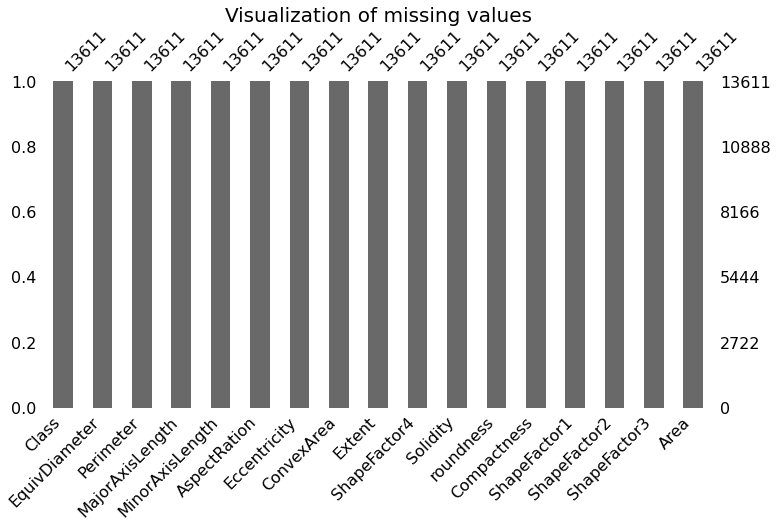

In [12]:
missingno.bar(data, fontsize=16, sort='descending', figsize=(12,6))
plt.title("Visualization of missing values", fontsize=20)
plt.show()

# Univariate analysis

## Area

In [13]:
data['Area'].nunique()

12011

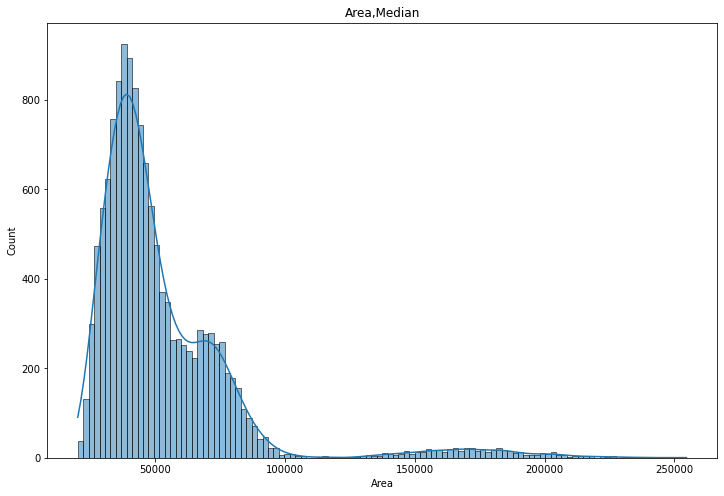

In [14]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x=data['Area'], kde=True)
plt.title("Area,Median")
plt.show()

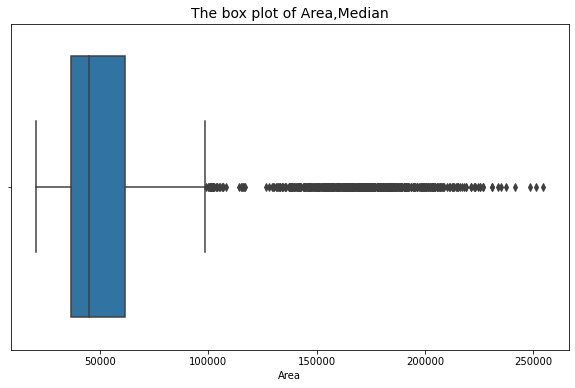

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Area')
plt.title("The box plot of Area,Median", fontsize=14)
plt.show()

## Perimeter

In [16]:
data['Perimeter'].nunique()

13351

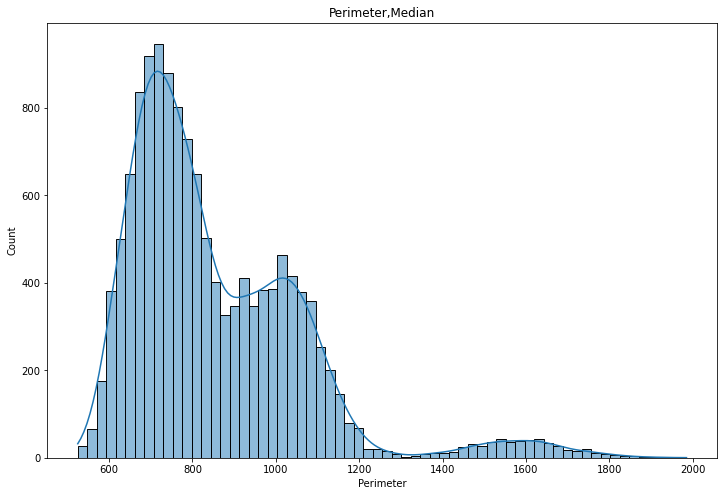

In [17]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x=data['Perimeter'], kde=True)
plt.title("Perimeter,Median")
plt.show()

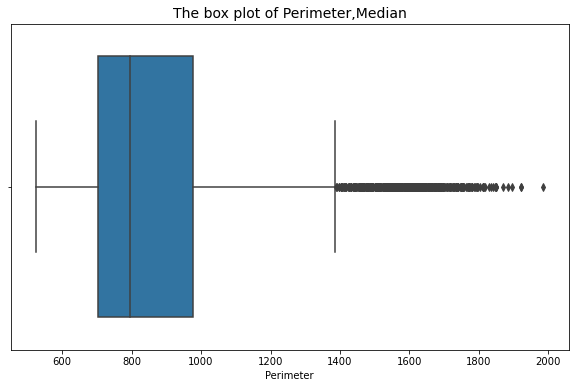

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Perimeter')
plt.title("The box plot of Perimeter,Median", fontsize=14)
plt.show()

## MajorAxisLength

In [19]:
data['MajorAxisLength'].nunique()

13543

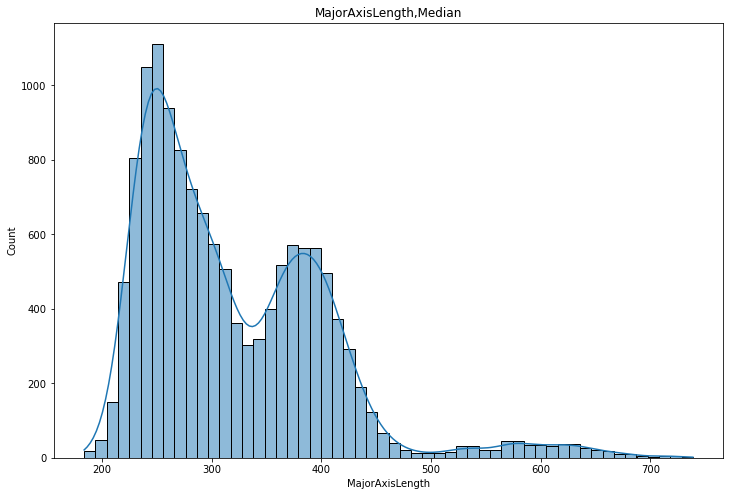

In [20]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x=data['MajorAxisLength'], kde=True)
plt.title("MajorAxisLength,Median")
plt.show()

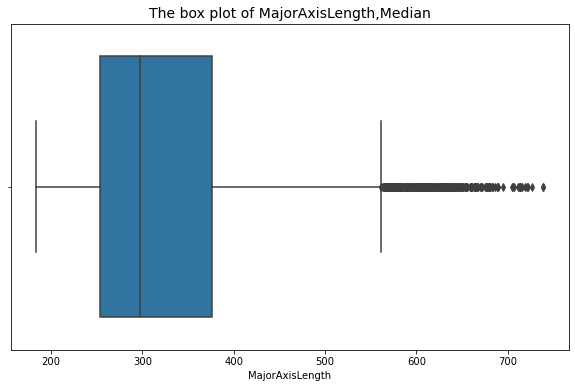

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='MajorAxisLength')
plt.title("The box plot of MajorAxisLength,Median", fontsize=14)
plt.show()

## MinorAxisLength

In [22]:
data['MinorAxisLength'].nunique()

13543

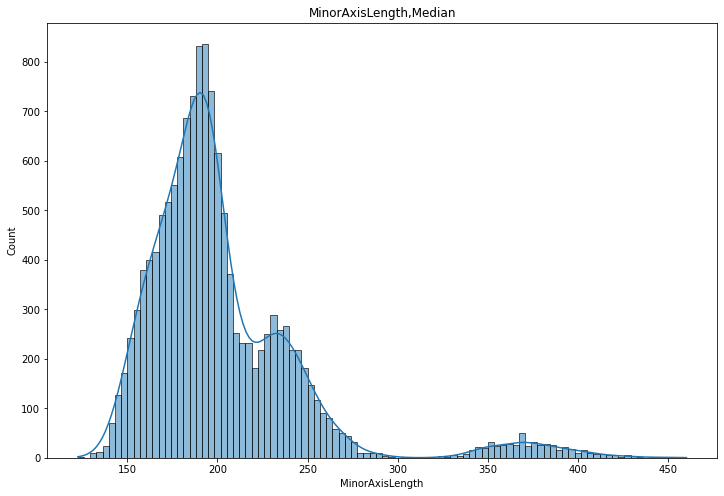

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x=data['MinorAxisLength'], kde=True)
plt.title("MinorAxisLength,Median")
plt.show()

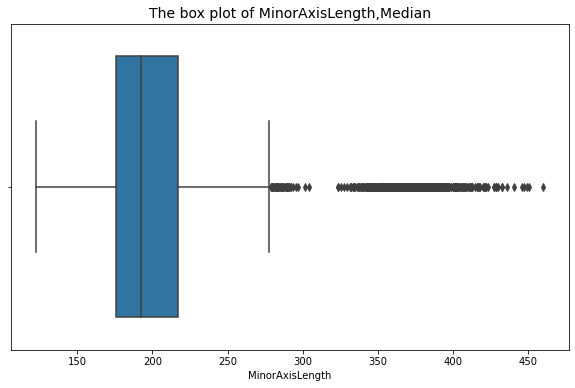

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='MinorAxisLength')
plt.title("The box plot of MinorAxisLength,Median", fontsize=14)
plt.show()

## AspectRation

In [25]:
data['AspectRation'].nunique()

13543

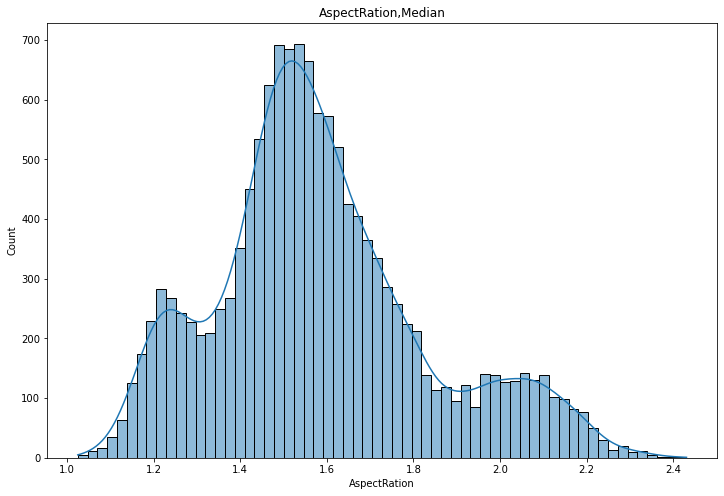

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x=data['AspectRation'], kde=True)
plt.title("AspectRation,Median")
plt.show()

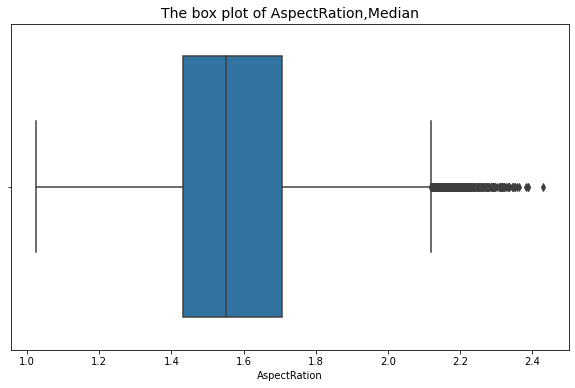

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='AspectRation')
plt.title("The box plot of AspectRation,Median", fontsize=14)
plt.show()

## Eccentricity

In [28]:
data['Eccentricity'].nunique()

13543

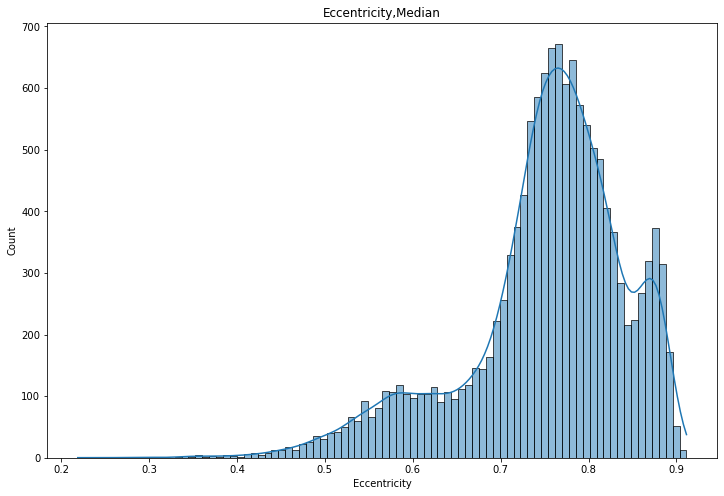

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x=data['Eccentricity'], kde=True)
plt.title("Eccentricity,Median")
plt.show()

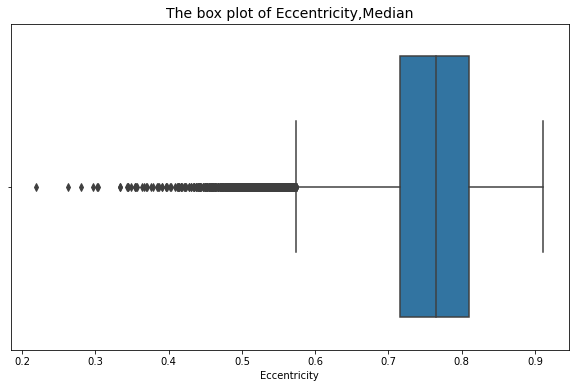

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Eccentricity')
plt.title("The box plot of Eccentricity,Median", fontsize=14)
plt.show()

## ConvexArea

In [31]:
data['ConvexArea'].nunique()

12066

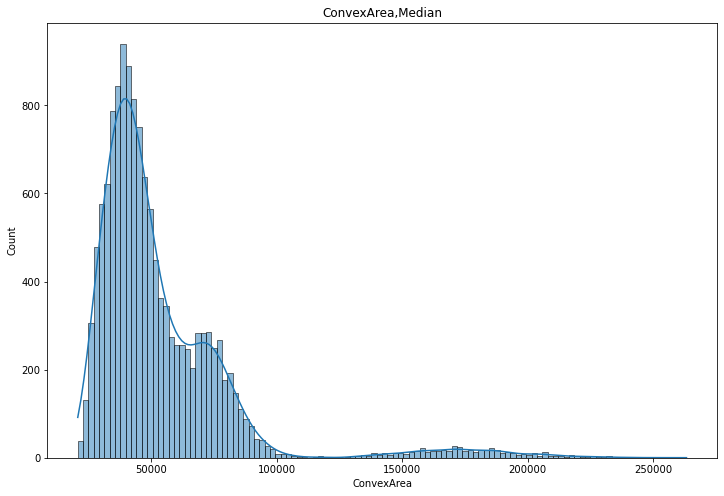

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x=data['ConvexArea'], kde=True)
plt.title("ConvexArea,Median")
plt.show()

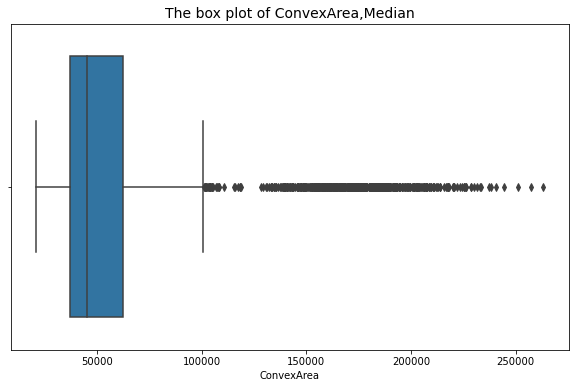

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='ConvexArea')
plt.title("The box plot of ConvexArea,Median", fontsize=14)
plt.show()

## EquivDiameter

In [34]:
data['EquivDiameter'].nunique()

12011

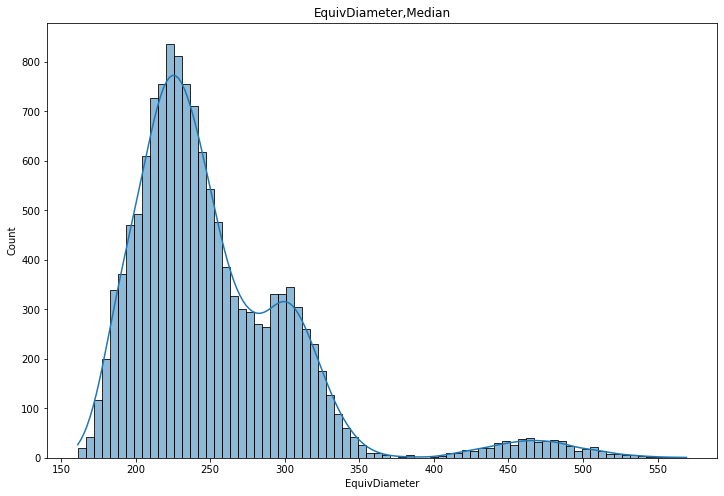

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x=data['EquivDiameter'], kde=True)
plt.title("EquivDiameter,Median")
plt.show()

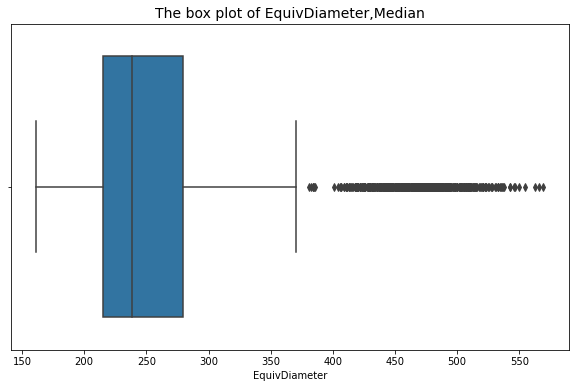

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='EquivDiameter')
plt.title("The box plot of EquivDiameter,Median", fontsize=14)
plt.show()

# Bivariate Analysis

## Area vs ConvexArea

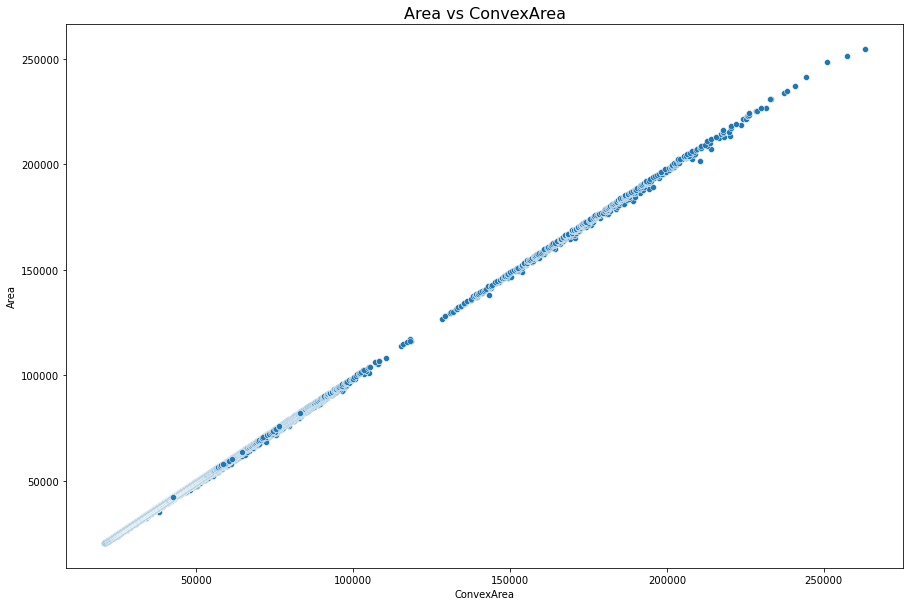

In [37]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'ConvexArea', y = 'Area', data = data)
plt.title("Area vs ConvexArea", fontsize=16)
plt.show()

## Area vs Perimeter

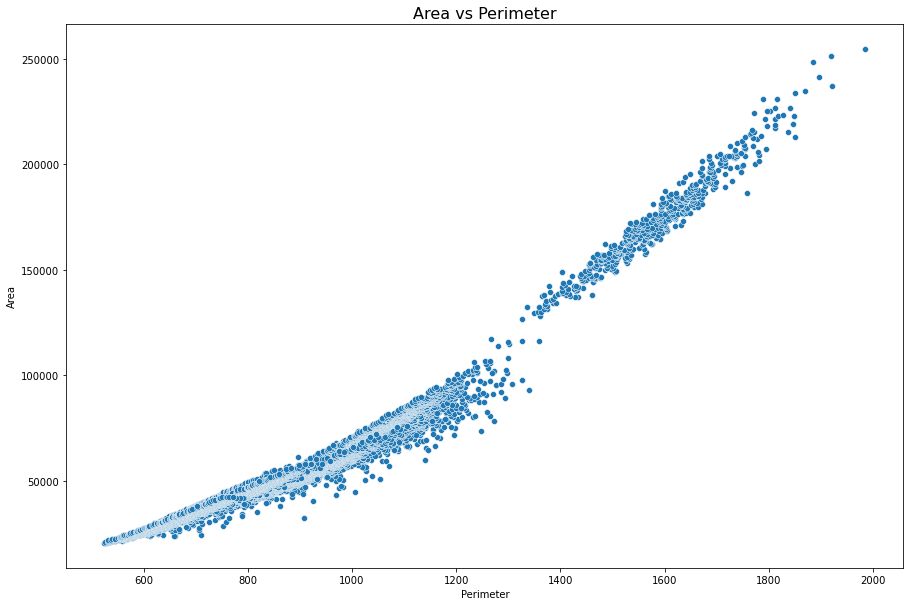

In [38]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'Perimeter', y = 'Area', data = data)
plt.title("Area vs Perimeter", fontsize=16)
plt.show()

## MajorAxisLength vs MinorAxisLength

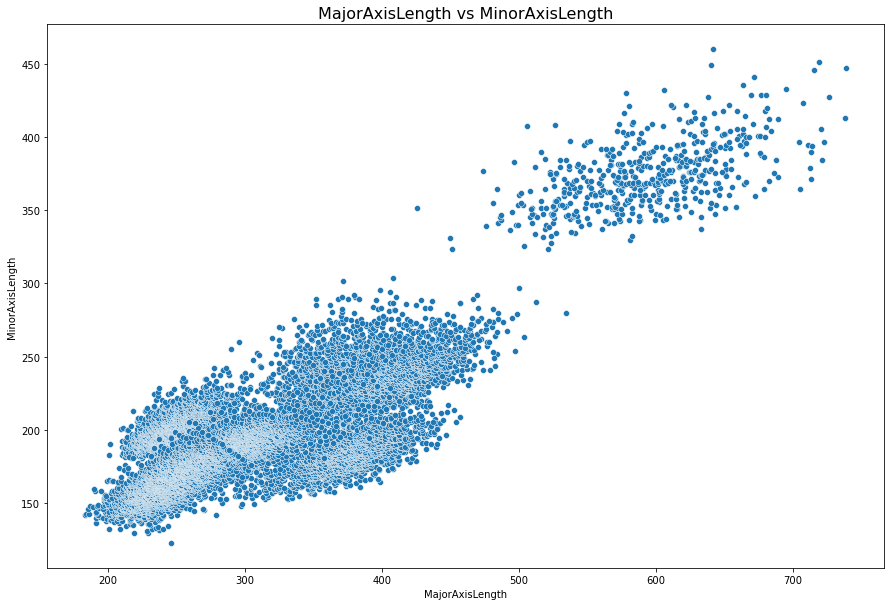

In [39]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'MajorAxisLength', y = 'MinorAxisLength', data = data)
plt.title("MajorAxisLength vs MinorAxisLength", fontsize=16)
plt.show()

## Area vs AspectRation

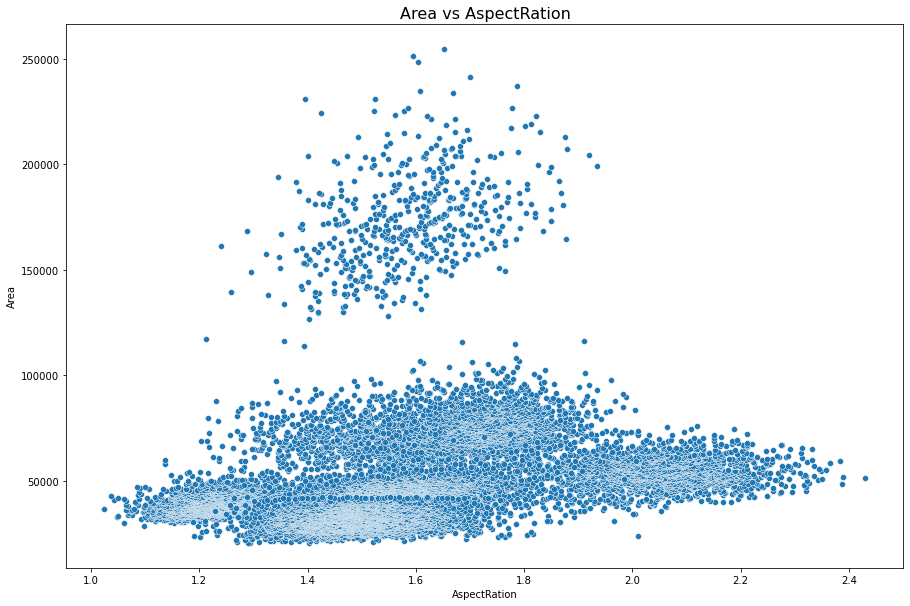

In [40]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'AspectRation', y = 'Area', data = data)
plt.title("Area vs AspectRation", fontsize=16)
plt.show()

## Area vs Eccentricity

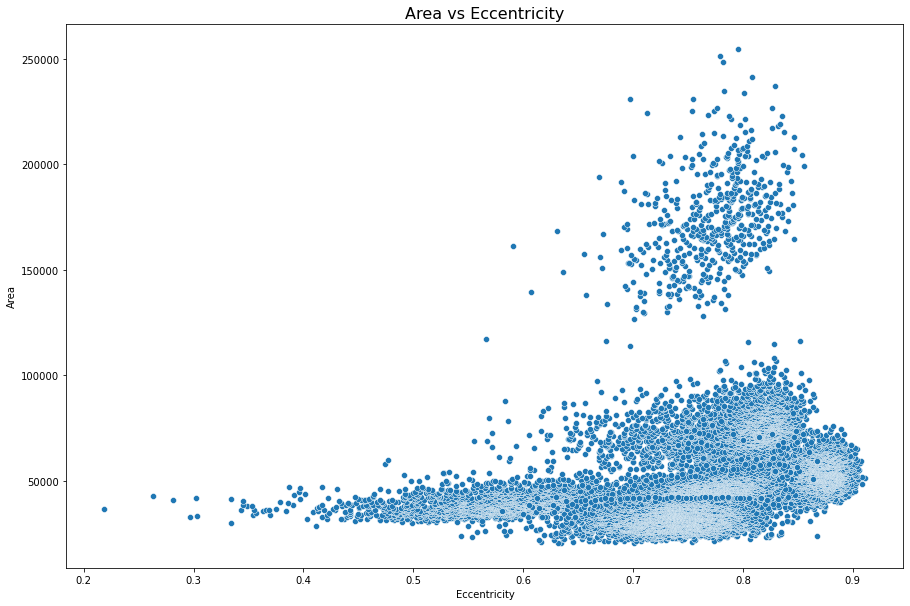

In [41]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'Eccentricity', y = 'Area', data = data)
plt.title("Area vs Eccentricity", fontsize=16)
plt.show()

## Area vs EquivDiameter

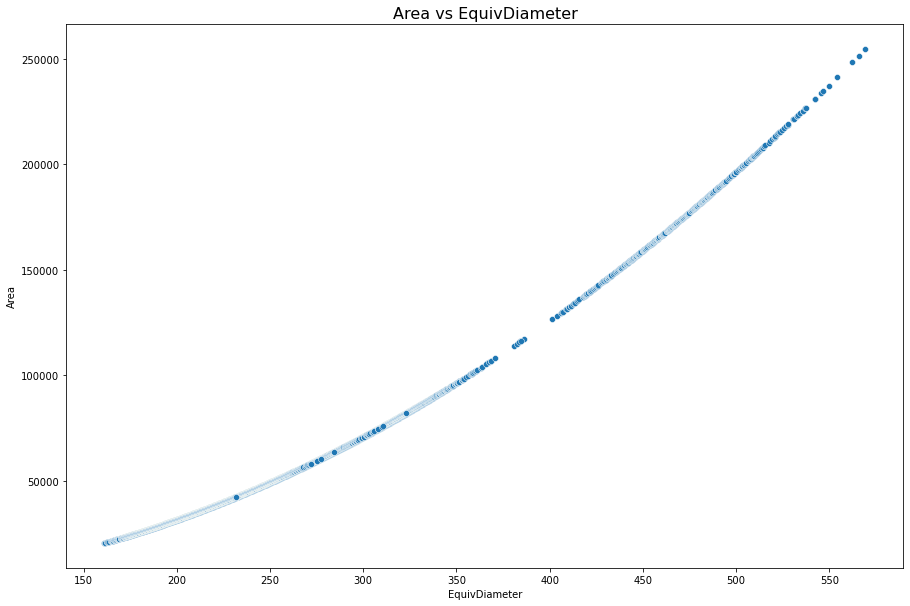

In [42]:
plt.figure(figsize = (15, 10))
sns.scatterplot(x = 'EquivDiameter', y = 'Area', data = data)
plt.title("Area vs EquivDiameter", fontsize=16)
plt.show()